# LAB 02: Data mining and visualization

### Team information

Class : 22KHDL

|Student's ID| Name |
|------------|--------------|
|22127460| Quách Trần Quán Vinh|
|22127478| Nguyễn Hoàng Trung Kiên|

### Import libraries

- Libraries to handle and visualize data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

## 1. Data collection and preprocessing

### 1.1. Collecting data

### 1.2. Preprocessing data

- Read data 

In [2]:
df = pd.read_excel('data/P_environment.xlsx')
df

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],2000 [YR2000],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.MT.CE.AR5,2.9222,1.0161,7.8257,8.3465,7.5276,8.0661,7.932,7.2491,7.0541,7.9308,8.2599,8.7073
1,Afghanistan,AFG,Nitrous oxide (N2O) emissions (total) excludin...,EN.GHG.N2O.MT.CE.AR5,2.0316,2.4473,3.8005,3.8415,3.9607,4.4631,3.9337,3.9491,3.6824,3.5777,3.5457,3.557
2,Afghanistan,AFG,Methane (CH4) emissions (total) excluding LULU...,EN.GHG.CH4.MT.CE.AR5,7.6437,10.4209,15.5429,14.9348,14.8077,14.773,15.2334,15.2741,15.3417,15.507,16.1232,16.4523
3,Afghanistan,AFG,Total greenhouse gas emissions excluding LULUC...,EN.GHG.ALL.MT.CE.AR5,12.5616,13.9157,27.4201,27.4083,26.634,27.6919,27.5533,26.9828,26.6463,27.6431,28.6141,29.4601
4,Afghanistan,AFG,Total greenhouse gas emissions excluding LULUC...,EN.GHG.ALL.PC.CE.AR5,1.042832,0.69128,0.836169,0.810135,0.767537,0.775924,0.749892,0.712772,0.682032,0.69107,0.705148,0.710657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8249,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data is read in the excel format.

There are two final lines of the data has data information, so we will drop those two lines.

In [3]:
df = df.iloc[:-2]

We convert each ```Series Name``` value into each column

In [4]:
df_long = pd.melt(
    df,
    id_vars=["Country Name", "Country Code", "Series Name", "Series Code"],
    value_vars=[col for col in df.columns if "YR" in col],
    var_name="Year",
    value_name="Value"
)

df_long_clean = df_long.dropna(subset=["Country Name", "Country Code", "Series Name"]).copy()
df = df_long_clean.pivot_table(
    index=["Country Name", "Country Code", "Year"],
    columns="Series Name",
    values="Value",
    aggfunc="first" 
).reset_index()
df.columns.name = None

- Data information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 34 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0   Country Name                                                                                      3192 non-null   object
 1   Country Code                                                                                      3192 non-null   object
 2   Year                                                                                              3192 non-null   object
 3   Access to clean fuels and technologies for cooking (% of population)                              3192 non-null   object
 4   Access to clean fuels and technologies for cooking, rural (% of rural population)                 3192 non-null   object
 5   Access

In [6]:
df.shape

(3192, 34)

The raw data now has 3192 rows and 34 columns.

- Data columns

In [7]:
print(df.columns)

Index(['Country Name', 'Country Code', 'Year',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Access to clean fuels and technologies for cooking, rural (% of rural population)',
       'Access to clean fuels and technologies for cooking, urban (% of urban population)',
       'Adjusted net savings, including particulate emission damage (% of GNI)',
       'Adjusted savings: carbon dioxide damage (% of GNI)',
       'Adjusted savings: consumption of fixed capital (% of GNI)',
       'Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)',
       'Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)',
       'Annual freshwater withdrawals, industry (% of total freshwater withdrawal)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)',
   

- Handle duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

There are no duplicates.

- Handle missing values

Through the dataset, some missing values instead of being represented by ```NaN```, they are represented by ```..```, so we convert them into ```NaN```.

In [9]:
pd.set_option('future.no_silent_downcasting', True)
df.replace('..', np.nan, inplace=True)
df.isna().sum()

Country Name                                                                                           0
Country Code                                                                                           0
Year                                                                                                   0
Access to clean fuels and technologies for cooking (% of population)                                 822
Access to clean fuels and technologies for cooking, rural (% of rural population)                    822
Access to clean fuels and technologies for cooking, urban (% of urban population)                    822
Adjusted net savings, including particulate emission damage (% of GNI)                              1391
Adjusted savings: carbon dioxide damage (% of GNI)                                                   815
Adjusted savings: consumption of fixed capital (% of GNI)                                            806
Annual freshwater withdrawals, agriculture (% of total 

So there are some missing values in some columns.

We remove the columns that have missing proportion higher than 50%.

In [10]:
threshold = len(df) * 0.5
df.dropna(axis=1, thresh=threshold, inplace=True)

To handle missing values, we first identify which columns have below or above 10% missing values. If columns have low missing values, we just fill them by ```median```. The other we fill them by ```Iterative Imputer``` with ```Random Forest Regressor``` estimator.

**Reasons:**
- Low missing columns' distribution will not be affected much when filling by ```median```.
- Most of the columns have high missing values, and their distribution may vary.
- The columns are continous variable so it is suitable to fill with ```Random Forest Regressor``` estimator.

In [11]:
df_numeric = df.drop(columns=['Country Name', 'Country Code', 'Year'])
missing_ratio = df_numeric.isnull().mean()
low_missing_cols = missing_ratio[missing_ratio <= 0.1].index  
high_missing_cols = missing_ratio[missing_ratio > 0.1].index  

Fill low missing columns by ```median```.

In [12]:
df_numeric[low_missing_cols] = df_numeric[low_missing_cols].fillna(df_numeric[low_missing_cols].median())

Scale columns using ```Standard Scaler``` to fill the other columns by ```Iterative Imputer```.

In [13]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

Fill the remain missing columns by ```Iterative Imputer``` with ```Random Forest Regressor``` estimator.

In [14]:
df_high_missing = pd.DataFrame(df_scaled, columns=df_numeric.columns)[high_missing_cols]

imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=30, random_state=42, n_jobs=-1),
    max_iter=5,
    random_state=42  
)
df_imputed_high = imputer.fit_transform(df_high_missing)

df_scaled[:, [df_numeric.columns.get_loc(col) for col in high_missing_cols]] = df_imputed_high
df_imputed = scaler.inverse_transform(df_scaled)
df_imputed = pd.DataFrame(df_imputed, columns=df_numeric.columns)


C:\Users\Ping\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Concatenate the imputed dataframe to the origin data with ```Country Name```, ```Country Code``` and ```Year```.

In [15]:
df = pd.concat([df[['Country Name', 'Country Code', 'Year']], df_imputed], axis=1)

Check the missing values again.

In [16]:
df.isna().sum()

Country Name                                                                                        0
Country Code                                                                                        0
Year                                                                                                0
Access to clean fuels and technologies for cooking (% of population)                                0
Access to clean fuels and technologies for cooking, rural (% of rural population)                   0
Access to clean fuels and technologies for cooking, urban (% of urban population)                   0
Adjusted net savings, including particulate emission damage (% of GNI)                              0
Adjusted savings: carbon dioxide damage (% of GNI)                                                  0
Adjusted savings: consumption of fixed capital (% of GNI)                                           0
Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)     

The data now has no missing values.

- Handle data format

We take a look through the data types.

In [17]:
df.dtypes

Country Name                                                                                         object
Country Code                                                                                         object
Year                                                                                                 object
Access to clean fuels and technologies for cooking (% of population)                                float64
Access to clean fuels and technologies for cooking, rural (% of rural population)                   float64
Access to clean fuels and technologies for cooking, urban (% of urban population)                   float64
Adjusted net savings, including particulate emission damage (% of GNI)                              float64
Adjusted savings: carbon dioxide damage (% of GNI)                                                  float64
Adjusted savings: consumption of fixed capital (% of GNI)                                           float64
Annual freshwater withdrawal

When looking through the data, we see that ```Year``` column is at string type with some unnecessary characters, we remove it and convert it into ```datatime``` type.

In [18]:
df["Year"] = df["Year"].str.extract(r"(\d{4})")[0].astype(int)

### Data after being preprocessed

In [19]:
df

,Country Name,Country Code,Year,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)","Adjusted net savings, including particulate emission damage (% of GNI)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: consumption of fixed capital (% of GNI),"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)",...,"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",Renewable energy consumption (% of total final energy consumption),Renewable internal freshwater resources per capita (cubic meters),"Renewable internal freshwater resources, total (billion cubic meters)",Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita),"Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)"
0,Afghanistan,AFG,1990,41.004489,18.971786,79.149218,-0.726441,3.504957,10.763450,98.914854,...,78.679332,95.076755,23.000000,3914.272858,47.150000,7.824292,13.258619,12.5616,1.042832,1.954705
1,Afghanistan,AFG,2000,5.500000,0.800000,25.300000,12.193743,3.801787,7.431459,98.606201,...,19.745178,54.606478,45.000000,2342.237163,47.150000,17.521162,19.494927,13.9157,0.691280,0.306013
2,Afghanistan,AFG,2014,26.100000,10.200000,78.000000,11.672982,0.799648,7.774864,98.169627,...,52.247964,82.142599,19.100000,1437.827763,47.150000,16.791427,21.928150,27.4201,0.836169,0.929913
3,Afghanistan,AFG,2015,27.600000,11.400000,79.500000,10.590811,1.025318,7.670384,98.169627,...,55.089416,84.441678,17.700000,1393.660703,47.150000,17.834058,22.445577,27.4083,0.810135,0.943409
4,Afghanistan,AFG,2016,28.800000,12.600000,80.500000,10.512680,1.045826,7.181729,98.169627,...,57.970101,86.755310,20.200000,1358.765661,47.150000,0.104707,0.100000,26.6340,0.767537,0.964733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,Zimbabwe,ZWE,2019,30.300000,6.700000,78.800000,5.664455,2.231775,8.864952,84.826632,...,48.871548,93.029902,81.000000,802.809545,12.260000,27.214747,27.214750,28.3694,1.857686,4.867751
3188,Zimbabwe,ZWE,2020,30.500000,6.900000,78.600000,1.454492,2.112573,9.377614,87.200183,...,48.282429,92.895129,84.100000,789.598019,12.260000,27.214747,27.214750,26.7706,1.724145,3.871768
3189,Zimbabwe,ZWE,2021,30.500000,7.100000,78.400000,8.542951,1.805455,9.856066,87.200183,...,47.695513,92.760319,82.400000,776.086410,12.260000,27.214747,27.214746,28.8784,1.828070,4.199630
3190,Zimbabwe,ZWE,2022,30.800000,7.200000,78.200000,4.648121,1.152595,10.090410,71.765638,...,47.695513,92.760319,77.573921,28915.145900,271.560667,27.214747,27.214747,29.8254,1.856077,19.927797


Store data into csv.

In [21]:
df.to_csv('./data/Environment Data Preprocessed.csv')

## 2. Data visualization

### 2.1. Data introduction

#### 2.1.1. Introduction

#### 2.1.2. Sample size

In [22]:
df.shape

(3192, 31)

The data now has 3192 rows and 31 columns.

#### 2.1.3. Structures

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 31 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Country Name                                                                                      3192 non-null   object 
 1   Country Code                                                                                      3192 non-null   object 
 2   Year                                                                                              3192 non-null   int64  
 3   Access to clean fuels and technologies for cooking (% of population)                              3192 non-null   float64
 4   Access to clean fuels and technologies for cooking, rural (% of rural population)                 3192 non-null   float64
 5  

**Meaning of each columns:**

| # | Column Name                         | Description |
|--|--------------------------------------|-------------|
|1| `Country Name`                       | Country's name |
|2| `Country Code`                       | Country's Code |
|3| `Year`                               | Year |
|4| `Access to clean fuels and technologies for cooking (% of population)` | Access to clean fuels and technologies for cooking is the proportion of total population primarily using clean cooking fuels and technologies for cooking. Under WHO guidelines, kerosene is excluded from clean cooking fuels |
|5| `Access to clean fuels and technologies for cooking, rural (% of rural population) ` | Access to clean fuels and technologies for cooking, rural is the proportion of rural population primarily using clean cooking fuels and technologies for cooking. Under WHO guidelines, kerosene is excluded from clean cooking fuels |
|6| `Access to clean fuels and technologies for cooking, urban (% of urban population)` | Access to clean fuels and technologies for cooking, urban is the proportion of urban population primarily using clean cooking fuels and technologies for cooking. Under WHO guidelines, kerosene is excluded from clean cooking fuels |
|7| `Adjusted net savings, including particulate emission damage (% of GNI)` | Adjusted net savings are equal to net national savings plus education expenditure and minus energy depletion, mineral depletion, net forest depletion, and carbon dioxide and particulate emissions damage |
|8| `Adjusted savings: carbon dioxide damage (% of GNI)` | Cost of damage due to carbon dioxide emissions from fossil fuel use and the manufacture of cement, estimated to be US$40 per ton of CO2 (the unit damage in 2017 US dollars for CO2 emitted in 2020) times the number of tons of CO2 emitted |
|9| `Adjusted savings: consumption of fixed capital (% of GNI)` | Consumption of fixed capital represents the replacement value of capital used up in the process of production |
|10| `Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)` | Annual freshwater withdrawals refer to total water withdrawals, not counting evaporation losses from storage basins. Withdrawals also include water from desalination plants in countries where they are a significant source. Withdrawals can exceed 100 percent of total renewable resources where extraction from nonrenewable aquifers or desalination plants is considerable or where there is significant water reuse. Withdrawals for agriculture are total withdrawals for irrigation and livestock production. Data are for the most recent year available for 1987-2002 |
|11| `Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)` | Annual freshwater withdrawals refer to total water withdrawals, not counting evaporation losses from storage basins. Withdrawals also include water from desalination plants in countries where they are a significant source. Withdrawals can exceed 100 percent of total renewable resources where extraction from nonrenewable aquifers or desalination plants is considerable or where there is significant water reuse. Withdrawals for domestic uses include drinking water, municipal use or supply, and use for public services, commercial establishments, and homes. Data are for the most recent year available for 1987-2002 |
|12| `Annual freshwater withdrawals, industry (% of total freshwater withdrawal)` | Annual freshwater withdrawals refer to total water withdrawals, not counting evaporation losses from storage basins. Withdrawals also include water from desalination plants in countries where they are a significant source. Withdrawals can exceed 100 percent of total renewable resources where extraction from nonrenewable aquifers or desalination plants is considerable or where there is significant water reuse. Withdrawals for industry are total withdrawals for direct industrial use (including withdrawals for cooling thermoelectric plants). Data are for the most recent year available for 1987-2002 |
|13| `Annual freshwater withdrawals, total (% of internal resources)` | Annual freshwater withdrawals refer to total water withdrawals, not counting evaporation losses from storage basins. Withdrawals also include water from desalination plants in countries where they are a significant source. Withdrawals can exceed 100 percent of total renewable resources where extraction from nonrenewable aquifers or desalination plants is considerable or where there is significant water reuse. Withdrawals for agriculture and industry are total withdrawals for irrigation and livestock production and for direct industrial use (including withdrawals for cooling thermoelectric plants). Withdrawals for domestic uses include drinking water, municipal use or supply, and use for public services, commercial establishments, and homes. Data are for the most recent year available for 1987-2002 |
|14| `Annual freshwater withdrawals, total (billion cubic meters)` | Annual freshwater withdrawals refer to total water withdrawals, not counting evaporation losses from storage basins. Withdrawals also include water from desalination plants in countries where they are a significant source. Withdrawals can exceed 100 percent of total renewable resources where extraction from nonrenewable aquifers or desalination plants is considerable or where there is significant water reuse. Withdrawals for agriculture and industry are total withdrawals for irrigation and livestock production and for direct industrial use (including withdrawals for cooling thermoelectric plants). Withdrawals for domestic uses include drinking water, municipal use or supply, and use for public services, commercial establishments, and homes. Data are for the most recent year available for 1987-2002 |
|15| `Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)` | A measure of annual emissions of carbon dioxide (CO2), one of the six Kyoto greenhouse gases (GHG), from the agriculture, energy, waste, and industrial sectors, excluding LULUCF.. The measure is standardized to carbon dioxide equivalent values using the Global Warming Potential (GWP) factors of IPCC's 5th Assessment Report (AR5) |
|16| `Forest area (% of land area)` | Forest area is land under natural or planted stands of trees of at least 5 meters in situ, whether productive or not, and excludes tree stands in agricultural production systems (for example, in fruit plantations and agroforestry systems) and trees in urban parks and gardens |
|17| `Forest area (sq. km)` | Forest area is land under natural or planted stands of trees of at least 5 meters in situ, whether productive or not, and excludes tree stands in agricultural production systems (for example, in fruit plantations and agroforestry systems) and trees in urban parks and gardens |
|18| `GDP (current US$)` | GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used |
|19| `Level of water stress: freshwater withdrawal as a proportion of available freshwater resources` | The level of water stress: freshwater withdrawal as a proportion of available freshwater resources is the ratio between total freshwater withdrawn by all major sectors and total renewable freshwater resources, after taking into account environmental water requirements. Main sectors, as defined by ISIC standards, include agriculture; forestry and fishing; manufacturing; electricity industry; and services. This indicator is also known as water withdrawal intensity |
|20| `Methane (CH4) emissions (total) excluding LULUCF (Mt CO2e)` | A measure of annual emissions of methane (CH4), one of the six Kyoto greenhouse gases (GHG), from the agriculture, energy, waste, and industrial sectors, excluding LULUCF.. The measure is standardized to carbon dioxide equivalent values using the Global Warming Potential (GWP) factors of IPCC's 5th Assessment Report (AR5) |
|21| `Nitrous oxide (N2O) emissions (total) excluding LULUCF (Mt CO2e)` | A measure of annual emissions of nitrous oxide (N2O), one of the six Kyoto greenhouse gases (GHG), from the agriculture, energy, waste, and industrial sectors, excluding LULUCF.. The measure is standardized to carbon dioxide equivalent values using the Global Warming Potential (GWP) factors of IPCC's 5th Assessment Report (AR5) |
|22| `People using at least basic drinking water services, rural (% of rural population)` | The percentage of people using at least basic water services.  This indicator encompasses both people using basic water services as well as those using safely managed water services.  Basic drinking water services is defined as drinking water from an improved source, provided collection time is not more than 30 minutes for a round trip.  Improved water sources include piped water, boreholes or tubewells, protected dug wells, protected springs, and packaged or delivered water |
|23| `People using at least basic drinking water services, urban (% of urban population)` | The percentage of people using at least basic water services.  This indicator encompasses both people using basic water services as well as those using safely managed water services.  Basic drinking water services is defined as drinking water from an improved source, provided collection time is not more than 30 minutes for a round trip.  Improved water sources include piped water, boreholes or tubewells, protected dug wells, protected springs, and packaged or delivered water |
|24| `Renewable energy consumption (% of total final energy consumption)` | Renewable energy consumption is the share of renewables energy in total final energy consumption |
|25| `Renewable internal freshwater resources per capita (cubic meters)` | Renewable internal freshwater resources flows refer to internal renewable resources (internal river flows and groundwater from rainfall) in the country. Renewable internal freshwater resources per capita are calculated using the World Bank's population estimates |
|26| `Renewable internal freshwater resources, total (billion cubic meters)` | Renewable internal freshwater resources flows refer to internal renewable resources (internal river flows and groundwater from rainfall) in the country |
|27| `Terrestrial and marine protected areas (% of total territorial area)` | Terrestrial protected areas are totally or partially protected areas of at least 1,000 hectares that are designated by national authorities as scientific reserves with limited public access, national parks, natural monuments, nature reserves or wildlife sanctuaries, protected landscapes, and areas managed mainly for sustainable use. Marine protected areas are areas of intertidal or subtidal terrain--and overlying water and associated flora and fauna and historical and cultural features--that have been reserved by law or other effective means to protect part or all of the enclosed environment. Sites protected under local or provincial law are excluded |
|28| `Total greenhouse gas emissions excluding LULUCF (Mt CO2e)` | A measure of annual emissions of the six greenhouse gases (GHG) covered by the Kyoto Protocol (carbon dioxide (CO2), methane (CH4), nitrous oxide (N2O), hydrofluorocarbons (HFCs), perfluorocarbons (PFCs), and sulphurhexafluoride (SF6)) from the energy, industry, waste, and agriculture sectors, standardized to carbon dioxide equivalent values. This measure excludes GHG fluxes caused by Land Use Change Land Use and Forestry (LULUCF), as these fluxes have larger uncertainties. The measure is standardized to carbon dioxide equivalent values using the Global Warming Potential (GWP) factors of IPCC's 5th Assessment Report (AR5) |
|29| `Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita)` | Total annual emissions of the six greenhouse gases (GHG) covered by the Kyoto Protocol (carbon dioxide (CO2), methane (CH4), nitrous oxide (N2O), hydrofluorocarbons (HFCs), perfluorocarbons (PFCs), and sulphurhexafluoride (SF6)) from the energy, industry, waste, and agriculture sectors, standardized to carbon dioxide equivalent values divided by the economy's population. This measure excludes GHG fluxes caused by Land Use Change Land Use and Forestry (LULUCF), as these fluxes have larger uncertainties |
|30| `Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)` | Water productivity is calculated as GDP in constant prices divided by annual total water withdrawal |

#### 2.1.4. Statistics description

In [24]:
df.describe()

,Year,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)","Adjusted net savings, including particulate emission damage (% of GNI)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: consumption of fixed capital (% of GNI),"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)","Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)","Annual freshwater withdrawals, industry (% of total freshwater withdrawal)",...,"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",Renewable energy consumption (% of total final energy consumption),Renewable internal freshwater resources per capita (cubic meters),"Renewable internal freshwater resources, total (billion cubic meters)",Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita),"Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)"
count,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,...,3192.000000,3192.000000,3.192000e+03,3.192000e+03,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000
mean,2014.583333,61.789548,49.875384,75.406613,8.281625,1.937833,12.702528,59.810280,25.326050,15.167660,...,80.789609,94.182639,2.845872e+01,1.372695e+04,1634.411553,12.850196,17.061401,1660.044117,6.488851,63.370559
std,9.368594,33.043396,37.297537,29.192629,9.134568,1.554745,4.919018,27.196258,21.300192,17.864771,...,19.199799,7.120278,2.662207e+01,3.962950e+04,4765.461230,12.764570,9.859550,5546.602910,8.618284,140.305267
min,1990.000000,0.000000,0.000000,0.000000,-81.622369,0.003926,0.620608,0.000000,0.303951,0.000000,...,5.685182,48.064237,3.552714e-15,-1.818989e-12,0.000000,0.000000,0.000000,0.001000,0.040639,0.219313
25%,2014.750000,37.353486,16.288824,64.756905,4.315777,0.923854,9.390406,44.368039,9.951486,4.399186,...,72.148961,93.410470,8.300000e+00,1.220524e+03,6.859000,5.844565,12.162303,10.135925,2.003176,6.592220
50%,2017.500000,61.628391,43.539027,84.255425,8.402427,1.399256,12.628034,66.320691,17.755974,9.804092,...,87.273160,95.942236,1.714236e+01,4.088248e+03,64.350000,10.863698,15.412677,46.460900,4.278793,17.773846
75%,2020.250000,97.392901,94.700000,99.300000,13.213489,2.662389,15.951974,78.280662,34.020372,16.311798,...,95.638414,98.878960,4.320000e+01,9.393442e+03,1359.740500,16.472680,21.540426,377.611875,8.011105,53.852600
max,2023.000000,100.000000,100.000000,100.000000,59.728953,26.208558,48.034024,99.696049,164.673913,96.421796,...,100.000000,100.000000,9.790000e+01,6.671219e+05,42808.602100,99.957456,62.500000,52962.900859,153.588046,1500.047031


- Numeric columns distribution

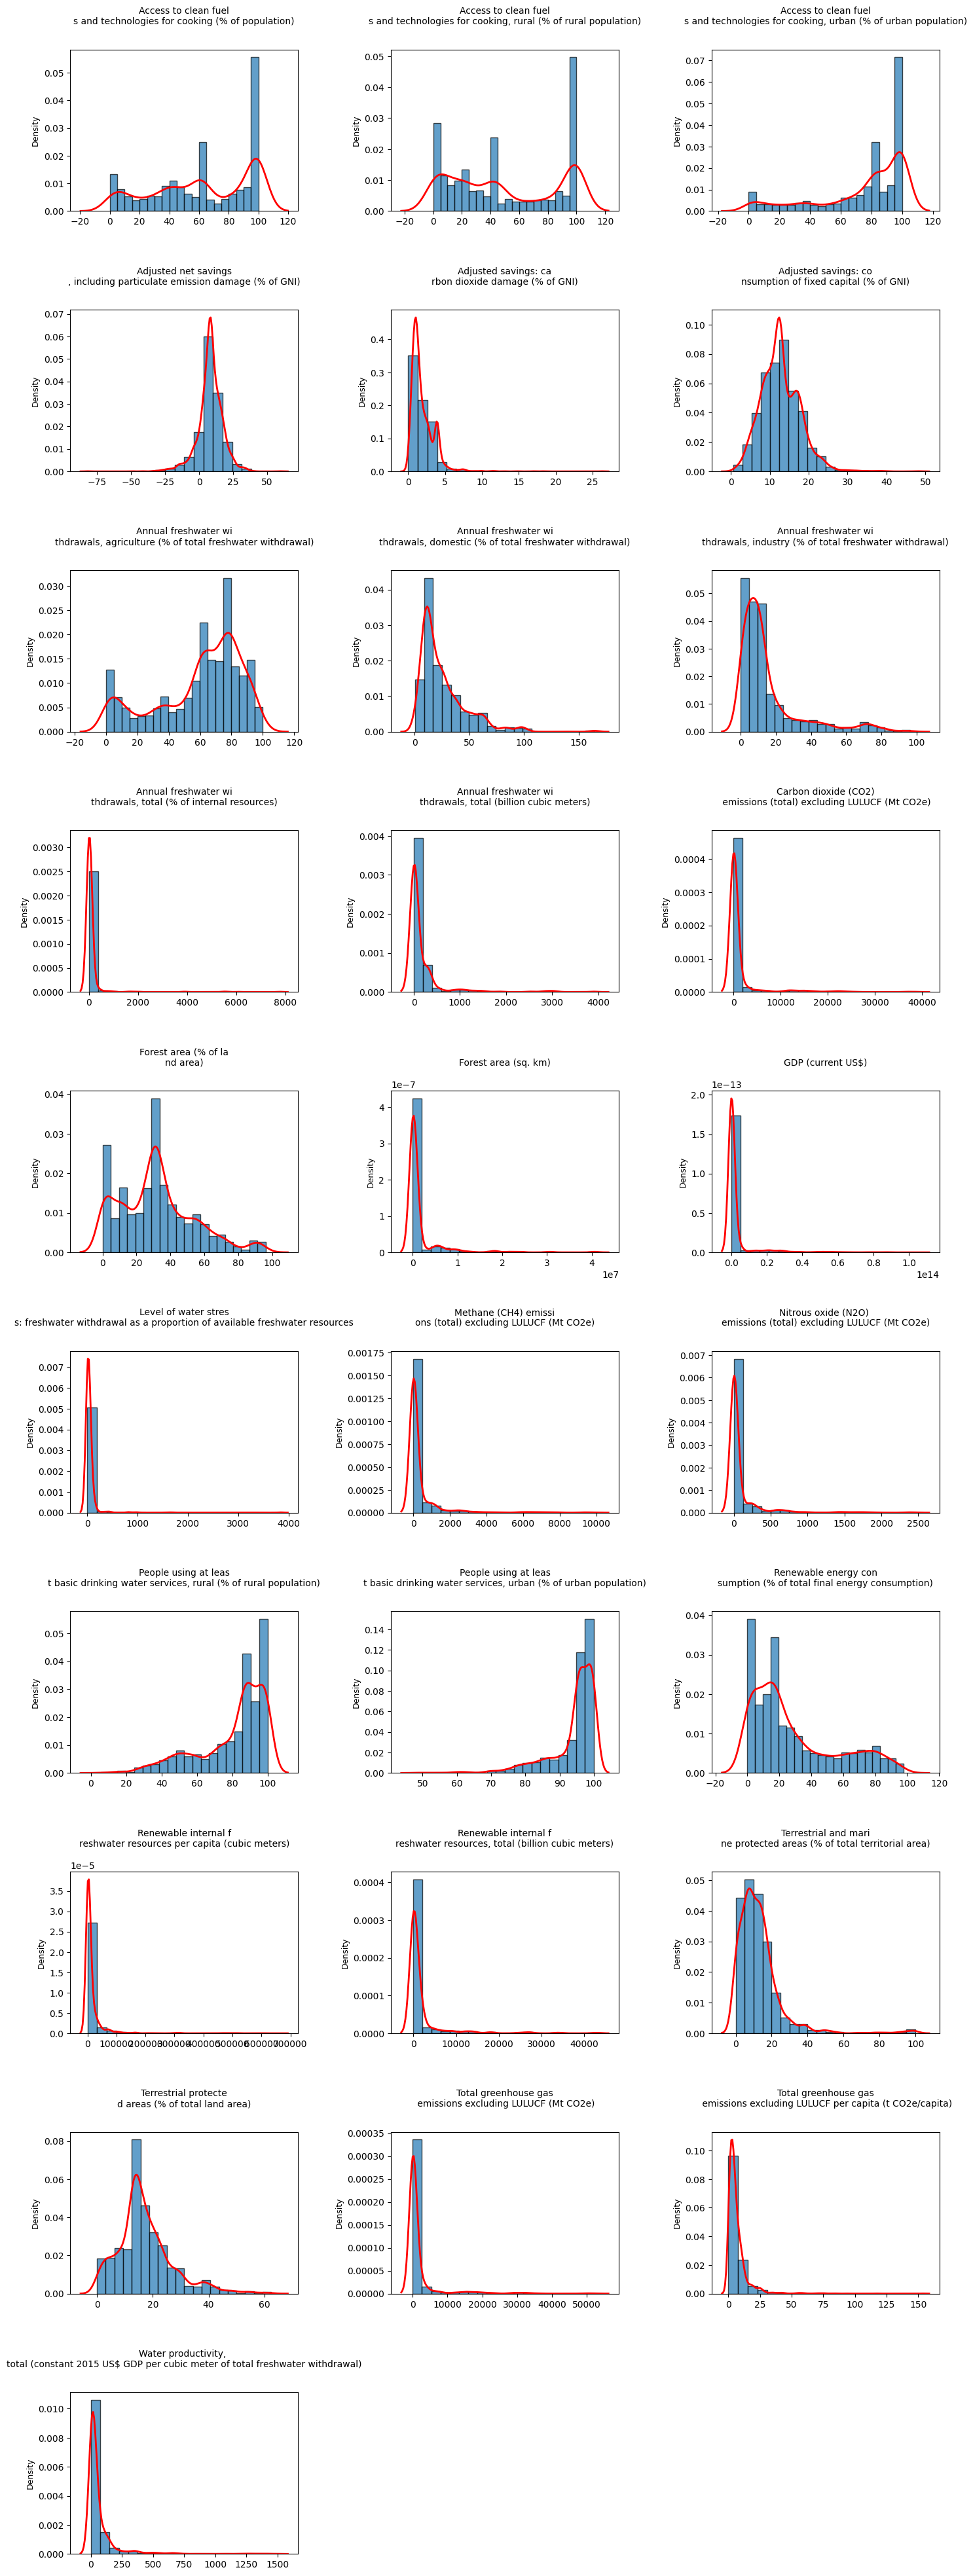

In [25]:
df_numeric = df.drop(columns=['Country Name', 'Country Code', 'Year'])

numeric_cols = df_numeric.columns
num_cols = len(numeric_cols)
rows = (num_cols // 3) + (num_cols % 3 > 0)  

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, 3, i + 1)
    plt.hist(df_numeric[col], bins=20, edgecolor='black', alpha=0.7, density=True)
    sns.kdeplot(df_numeric[col], color='red', linewidth=2)
    
    if len(col) > 20:
        col_title = col[:20] + '\n' + col[20:]  
    else:
        col_title = col
        
    plt.title(col_title, fontsize=10, pad=10, y=1.1)
    plt.ylabel('Density', fontsize=9)
    plt.xlabel('')

plt.tight_layout(pad=3.0)
plt.show()


### 2.2. Visualization objectives

There are 2 members in our team, so we decide to derive 6 objectives:

#### 1. How do Pop tracks perform compared to other genres on Spotify from 2020 to 2024?

**Benefits**
- Helps the artists and producers release tracks that can increase their engagement, keep up with the trends and reach a wider audience. 

- Enhances playlists, keeps listeners engaged, and recommends the best mix of Pop songs.

**Features used in data**

- ```release_date```, ```genre```, ```spotify_plays```, ```spotify_popularity```

#### 2. Which season produces the most successful Spotify tracks in terms of YouTube popularity?

**Benefits**
- Helps the artists, producers or content creators make strategies to release trending tracks, from that maximizing views and likes count on Youtube platform.

- Viewers can discover the best music videos or playlists for every seasons.

**Features used in data**

- ```spotify_popularity```, ```release date```, ```youtube_likes```, ```youtube_views```

#### 3. Which artist has the greatest influence on Spotify, and is this related to their music genre?

**Benefits**
- Provides insights for artists, music producers to review their current work and make some useful strategies for the future plans.

- Helps to understand if the successful artists made huge influence across different platforms.

- Enhances playlist filter by featuring artists with strong cross-platform influence.

**Features used in data**  
- `genre`, `artist`, `spotify_plays`

#### 4. How does explicit content affect a track's popularity across platform?

**Benefits**
- Helps artists and composers alter the lyrics which is suitable for the audience expectation for maximum reach and engagement.

- Reveals audience preferences for explicit vs. clean content across different genres whether they prefer the tracks that have explicit content or not.

**Features used in data**
- ```genre```, ```explicit```, ```score```, ```spotify_popularity```, `spotify_plays`, ...

### 2.3. Analyzing objectives

#### 1. How do Pop tracks perform compared to other genres on Spotify from 2020 to 2024?
##### First, we identify the Pop tracks in the dataset

#### 2. Which season produces the most successful Spotify tracks in terms of YouTube popularity?
##### First, we classify each track based on four seasons in year

#### 3. Which song by the top 10 artists on Spotify has the greatest influence, and is this related to the music genre?
##### First, we visualize top 10 artists with highest `spotify_plays` in entire dataset
We will use **bar chart** to visualize the distribution.  

**Reason**: It is easier to show top 10 artists by the total `spotify_plays` of all their tracks.

#### 4. How does explicit content affect a track's popularity across platform?
First, let's breakdown the objectives into smaller analysis to get more insights
##### What is the distribution of explicit and non-explicit tracks over the entire dataset?
We will use **pie chart** to visualize this question.

**Reason**: To the percentage of explicit and non-explicit over the entire data.